# Алгоритм GrabCut
http://en.wikipedia.org/wiki/GrabCut

In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Загружаем изображение

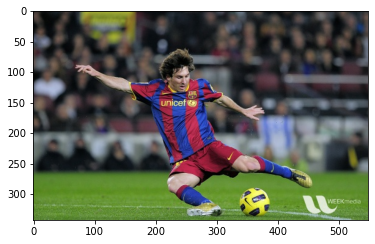

In [2]:
img = cv2.imread('data/messi5.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Рамкой выделяем область для оценки распределения значений пикселей объекта

In [3]:
# прямоугльником задаем область принадлежащую объекту
RECT = (50,50,450,290)

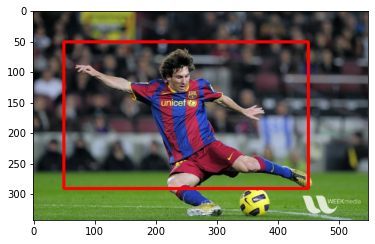

In [4]:
# визуализируем выделенную область
x1, y1, x2, y2 = RECT
tmp = cv2.rectangle(np.copy(img), (x1,y1), (x2,y2), (0,0,255), 3)
plt.imshow(cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB))

## Запускаем алгоритм GrabCut

In [5]:
# выделяем память под результат работы алгоритма
mask = np.zeros(img.shape[:2], np.uint8)

# выделяем память необходимую для работы алгоритма
bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

cv2.grabCut(img, mask, RECT, bgdModel,
            fgdModel, 5, cv2.GC_INIT_WITH_RECT);

# Выводим результат

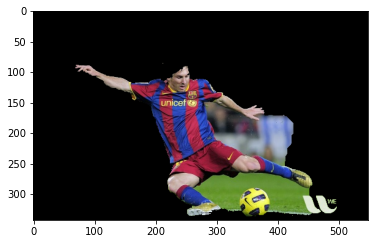

In [6]:
mask2 = np.where((mask==0)|(mask==2), 0, 1).astype('uint8')
result = img * mask2[:,:,np.newaxis]
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

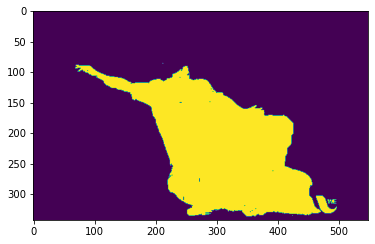

In [7]:
plt.imshow(mask2)